# PROBLEM STATEMENT
- BSA cycles a famous bicycle company has collected the data of sharing of bicycle for two consecutive years. With this data they want to do an analysis on how the sharing of the bicycle happens in different environmental and seasonal changes. Thereby, they even want to predict the sharing of the data for the upcoming year. Hence, the goal of the study is to build a system and come up with the prediction for the following year.

### 1.	Identify and define the problem statement clearly also mention why it is necessary for an organisation to solve the problem.

### Identification of the problem:
- To check how different factors are affecting the rental of bicycles with change in weather condition.

    
### Defining the problem: 
- Now a days its seem that rental bicycle, bikes, cars etc are easily availabe and more affordable one then buying it completely.As a result companies like BSA are facing loss in it. We have to check at what rate the number of customers of rental cycles increasing.How it is affected by seasons,holidays,temperature,humidity etc

### Necessity of defining the problem:
- It will give a clear view of the trend how the rental of bicycles have been changing over year. On the basis of these data, company will have the idea of the amount of bicycles to be produced in a particular year so that they can come up with plans aiming for maximum profit.

# HYPOTHESIS

- To check whether there is any relation between the sabbatical, weekday, workingday w.r.t total count of bicycle rental?
- To check whether  there is any variation in total count of rental cycles during different seasons?
- To check whether there is any relation between various weather conditions

## PERFORMING EXPLORATORY DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Importing the dataset

In [2]:
dataset=pd.read_csv('day_lease.csv')
dataset.head()

,item,dteday,spell,yr,mnth,sabbatical,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cas,reg,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Checking the dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
item          731 non-null int64
dteday        731 non-null object
spell         731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
sabbatical    731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cas           731 non-null int64
reg           731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
dataset.columns

Index(['item', 'dteday', 'spell', 'yr', 'mnth', 'sabbatical', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cas',
       'reg', 'cnt'],
      dtype='object')

## Checking for Outliers

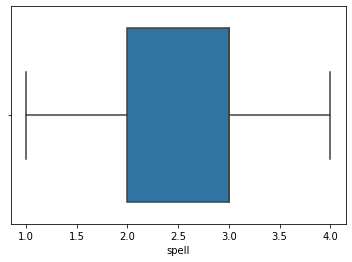

In [5]:
sb.boxplot(dataset['spell'])

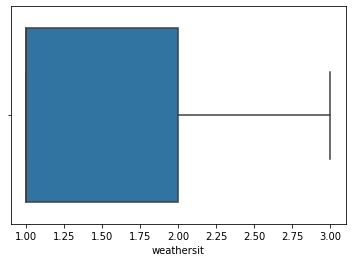

In [6]:
sb.boxplot(dataset['weathersit'])

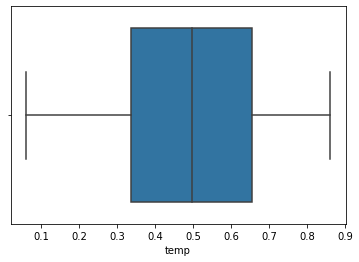

In [7]:
sb.boxplot(dataset['temp'])

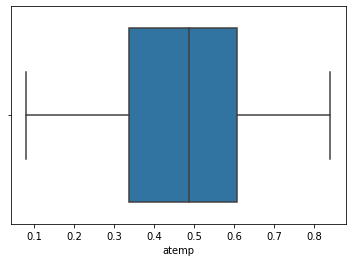

In [8]:
sb.boxplot(dataset['atemp'])

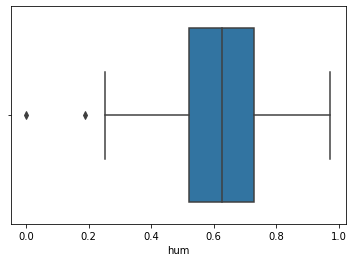

In [9]:
sb.boxplot(dataset['hum'])

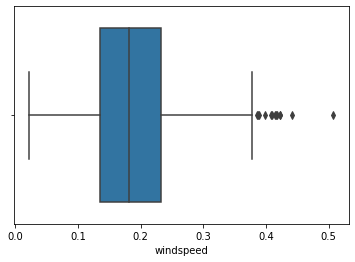

In [10]:
sb.boxplot(dataset['windspeed'])

## Removal of the outliers

In [11]:
def outliers(name):
    q1=dataset[name].quantile(0.25)
    q3=dataset[name].quantile(0.75)
    iqr=q3-q1
    ub=q3+(iqr*1.5)
    lb=q1-(iqr*1.5)
    dataset[name]=dataset[name].replace(dataset[dataset[name]<lb][name],dataset[name].quantile(0.01))
    dataset[name]=dataset[name].replace(dataset[dataset[name]>ub][name],dataset[name].quantile(0.99))

In [12]:
outliers('hum')

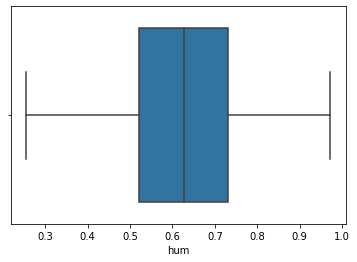

In [13]:
sb.boxplot(dataset['hum'])

In [14]:
outliers('windspeed')

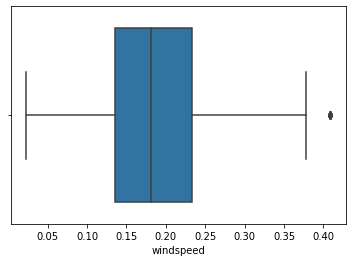

In [15]:
sb.boxplot(dataset['windspeed'])

## Season wise count of bicycle rented

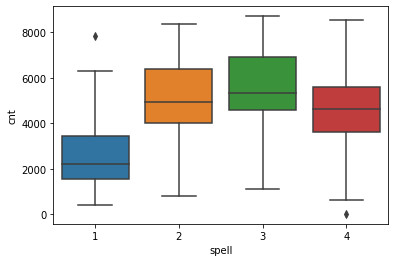

In [16]:
sb.boxplot(dataset['spell'],dataset['cnt'])

In [17]:
season=dataset.groupby('spell')['cas','reg','cnt'].sum()
season

,cas,reg,cnt
spell,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


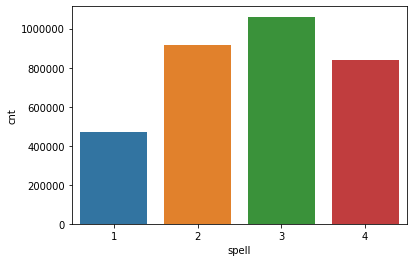

In [18]:
Season=dataset.groupby('spell')['cnt'].sum()
Season=Season.reset_index()
sb.barplot(Season['spell'],Season['cnt']) 

- Above graph shows that the rental of bicycle is more in 3rd case that is 'Fall' and less in 'Springer'



In [19]:
### this can be checked with the anova also
### Null hypothesis(Ho)=mean of each season with respect to count of rental cycle is same
### Alternative hypothesis(H1)=their is a difference in mean for each season with respect to the count of rental cycle

f_oneway(dataset[dataset['spell']==1]['cnt'],dataset[dataset['spell']==2]['cnt'],dataset[dataset['spell']==3]['cnt'],dataset[dataset['spell']==3]['cnt'])

F_onewayResult(statistic=167.8049340210731, pvalue=6.66046507684372e-83)

- Here we have seen that the value of p < 0.05, hence we are to reject our null hypothesis and we proceed futher with our post hoc test

In [20]:
## perform multiple pairwise comparision(Tukey HSD)
season1=pairwise_tukeyhsd(dataset['spell'],dataset['cnt'],alpha=0.05)
print(season1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Monthwise count of bicycle rented

In [21]:
dataset.groupby('mnth')['cas','reg','cnt'].sum()

,cas,reg,cnt
mnth,,,
1,12042,122891,134933
2,14963,136389,151352
3,44444,184476,228920
4,60802,208292,269094
5,75285,256401,331686
6,73906,272436,346342
7,78157,266791,344948
8,72039,279155,351194
9,70323,275668,345991


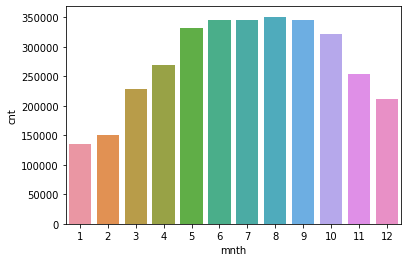

In [22]:
month=dataset.groupby('mnth')['cnt'].sum()
month=month.reset_index()
sb.barplot(month['mnth'],month['cnt']) 

### from the above graph we can see that August month has the highest count of bicycle rental and lowest is in the month of january

### Yearwise count of bicycle rented

In [23]:
dataset.groupby('yr')['cas','reg','cnt'].sum()

,cas,reg,cnt
yr,,,
0,247252,995851,1243103
1,372765,1676811,2049576


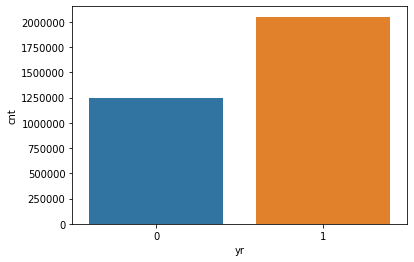

In [24]:
year=dataset.groupby('yr')['cnt'].sum()
year=year.reset_index()
sb.barplot(year['yr'],year['cnt']) 

### above graph shows that with the increase in years the renatl of bicycle also increases

### Holidaywise count of bicycle rented

In [25]:
dataset.groupby('sabbatical')['cas','reg','cnt'].sum()

,cas,reg,cnt
sabbatical,,,
0,597658,2616586,3214244
1,22359,56076,78435


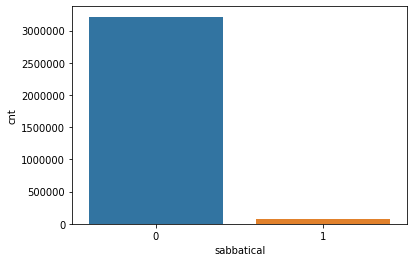

In [26]:
Holiday=dataset.groupby('sabbatical')['cnt'].sum()
Holiday=Holiday.reset_index()
sb.barplot(Holiday['sabbatical'],Holiday['cnt']) 

### Above graph says that the on holidays the bicycle rental is less

## Weekdaywise count of bicycle rented

In [27]:
dataset.groupby('weekday')['cas','reg','cnt'].sum()

,cas,reg,cnt
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


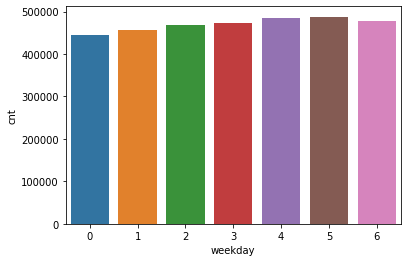

In [28]:
weekdays=dataset.groupby('weekday')['cnt'].sum()
weekdays=weekdays.reset_index()
sb.barplot(weekdays['weekday'],weekdays['cnt']) 

### Above graph shows that among the weekdays friday dhows the highest rental of the bicycle

## Workingday count of bicycle rented

In [29]:
dataset.groupby('workingday')['cas','reg','cnt'].sum()

,cas,reg,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


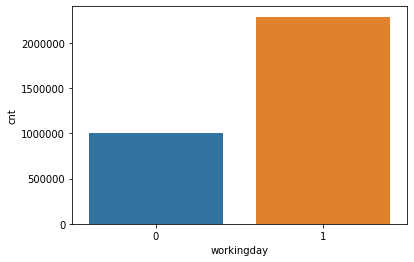

In [30]:
workingdays=dataset.groupby('workingday')['cnt'].sum()
workingdays=workingdays.reset_index()
sb.barplot(workingdays['workingday'],workingdays['cnt']) 

### From the above three tables we can see that the weekdays has the highest count of rented bicycle.So we if we consider only the workingdays table there will be no loss in data

## Count of rental bicycles with respect to weathersit

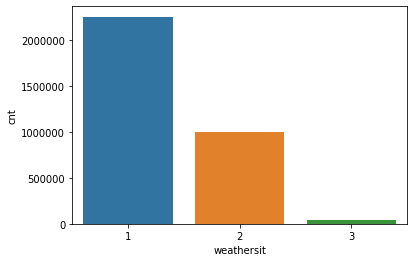

In [31]:
Weather=dataset.groupby('weathersit')['cnt'].sum()
Weather=Weather.reset_index()
sb.barplot(Weather['weathersit'],Weather['cnt'])

In [32]:
year_s=dataset.groupby(['yr','spell'])['cnt'].sum().reset_index()
year_s

,yr,spell,cnt
0,0,1,150000
1,0,2,347316
2,0,3,419650
3,0,4,326137
4,1,1,321348
5,1,2,571273
6,1,3,641479
7,1,4,515476


Text(0, 0.5, 'Count')

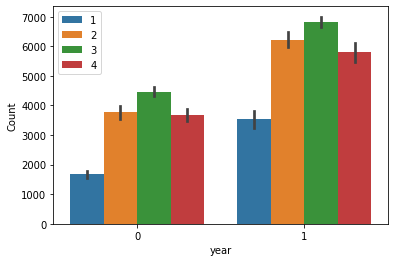

In [33]:
sb.barplot(dataset['yr'],dataset['cnt'],hue=dataset['spell'])
plt.legend(loc='upper left')
plt.xlabel("year")
plt.ylabel("Count")

### From the above graph we can see that in consecutive years count of rented bicycles increases with gradual increase in all seasons.

## Correlation

In [34]:
data1=dataset.iloc[:,9:]

In [35]:
data1.corr()

,temp,atemp,hum,windspeed,cas,reg,cnt
temp,1.000000,0.991702,0.126260,-0.157767,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139590,-0.183663,0.543864,0.544192,0.631066
hum,0.126260,0.139590,1.000000,-0.241390,-0.082150,-0.100293,-0.109894
windspeed,-0.157767,-0.183663,-0.241390,1.000000,-0.167389,-0.216694,-0.233858
cas,0.543285,0.543864,-0.082150,-0.167389,1.000000,0.395282,0.672804
reg,0.540012,0.544192,-0.100293,-0.216694,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.109894,-0.233858,0.672804,0.945517,1.000000


### From the correlation table we can say that temperature and atmospheric temperature are highly correlated. And if we drop any one of these,there will be not much loss in information 

In [36]:
X=dataset[['yr','mnth','spell','workingday','weathersit','temp','hum','windspeed']]
Y=dataset.iloc[:,-1].values

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [38]:
le=LinearRegression()
le.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_pred=le.predict(x_test)

In [40]:
le.coef_

array([ 1966.97710613,   -28.72552764,   465.6091973 ,   111.93049927,
        -500.34414682,  5296.19010386, -1353.85345942, -3029.28214942])

In [41]:
le.intercept_

1970.0013501539402

In [42]:
from sklearn.metrics import r2_score,mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("RMSE=",rmse)
print("R2_score=",r2)

RMSE= 931.2638691186879
R2_score= 0.7960914012139393


## Same can be done with the help of Principal component Analysis

In [43]:
X=dataset.iloc[:,2:13].values
Y=dataset.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=0)

In [44]:
pca = PCA()
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [45]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([7.14740149e-01, 2.19306754e-01, 1.86174948e-02, 1.66690398e-02,
       1.39553532e-02, 1.15416888e-02, 2.92578119e-03, 1.36295329e-03,
       6.11137761e-04, 2.55078636e-04, 1.45697496e-05])

- from the explained_varience we can say that the first principal component give 71% of the information 2nd princiapl component gives the 
- 21% of the information and so on

In [47]:
pca = PCA(n_components=8)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [48]:
le=LinearRegression()
le.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_pred=le.predict(X_test)

In [50]:
le.coef_

array([ -155.33412698,   -40.31804885, -1163.76593977,  -937.88852822,
        2063.67212718,    16.10177128,  3729.00932552,  -235.81967344])

In [51]:
le.intercept_

4495.287671232876

In [52]:
from sklearn.metrics import r2_score,mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("RMSE=",rmse)
print("R2_score=",r2)

RMSE= 908.2702587659065
R2_score= 0.8060364072260796


### R2_score value shows that 80% of variance in dependent variable is explained by the independent variables

Text(0.5, 1.0, 'Residual Plot')

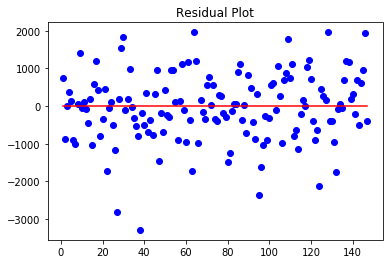

In [54]:
# Plotting residual plot
x=[i for i in range(1,len(y_pred)+1)]
plt.scatter(x,(y_test-y_pred),color='blue')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")

### Since there is no change in pattern in the residual plot hence its a linear model